# CLASIFICACION CON SVM Y NN

En la presente actividad se va a emplear un dataset que contiene información de características de celulares para clasificarlos en un rango de precios.

La información del *dataset* es:
* *battery_power*: Energía total que una batería puede almacenar en un tiempo medido en *mAh*
* *blue*: Indica si tiene *bluetooth* o no
* *clock_speed*: Velocidad del microprocesador
* *dual_sim*: Indica si tiene soporte dual de *sim* o no
* *fc*: Megapíxeles de la cámara frontal
* *four_g*: Indica si tiene 4G o no
* *int_memory*: Memoria interna en GB
* *m_dep*: Grosor del celular en cm
* *mobile_wt*: Peso del celular
* *n_cores*: Número de núcleos del procesador
* *pc*: Megapíxeles de la cámara principal
* *px_height*: Alto de la resolución de píxeles
* *px_width*: Ancho de resolución de píxeles
* *ram*: RAM en MB
* *sc_h*: Alto de la pantalla en cm
* *sc_w*: Ancho de la pantalla en cm
* *talk_time*: tiempo máximo que durará una sola carga de la batería
* *tres_g*: Indica si es 3G o no
* *touch_screen*: Indica si tiene pantalla táctil o no
* *wifi*: Indica si tiene wifi o no
* ***price_range***: Es la variable objetivo con valor 0 (bajo costo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

---

# Recomendaciones generales

1. **Establece una semilla aleatoria** para garantizar la reproducibilidad de los resultados (la semilla se definirá más adelante).
2. **Lee el dataset solo una vez**, al inicio del notebook. Evita cargarlo repetidamente.
3. **Usa exclusivamente los hiperparámetros indicados** en cada modelo. Por ejemplo, en el primer SVM utiliza C=1. No modifiques ningún valor a menos que se solicite explícitamente.
4. **Organiza tu notebook** incluyendo celdas para: código, visualizaciones y análisis textual (explicaciones, interpretaciones, etc.).
5. **Responde de manera clara y completa**, siguiendo las instrucciones de cada ejercicio. Cuida tu redacción, ortografía y coherencia.
6. **Ante dudas o ambigüedades**, consulta a través de los canales de comunicación establecidos para resolverlas oportunamente.
7. **Antes de entregar tu actividad**, reinicia el kernel y ejecuta todas las celdas nuevamente para verificar la coherencia de los resultados.

### IMPORTACIÓN DE LIBRERIAS A UTILIZAR

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Definición de semilla

In [5]:
# La semilla que se va a emplear en la presente actividad es 1234, la cual no debes modificar, para garantizar que los resultados que reportes coincidan con los esperados

seed = 1234

### CARGA DEL DATASET

In [6]:
data = pd.read_csv('train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [7]:
#Tamaño del dataset
data.shape

(2000, 21)

In [8]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 1. Análisis Exploratorio de Datos (EDA)

## Variables numéricas

In [9]:
#Resumen estadístico de las variables
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### **1.1. Escriba el código que permita crear la matriz de correlación de todas las variables numéricas:**

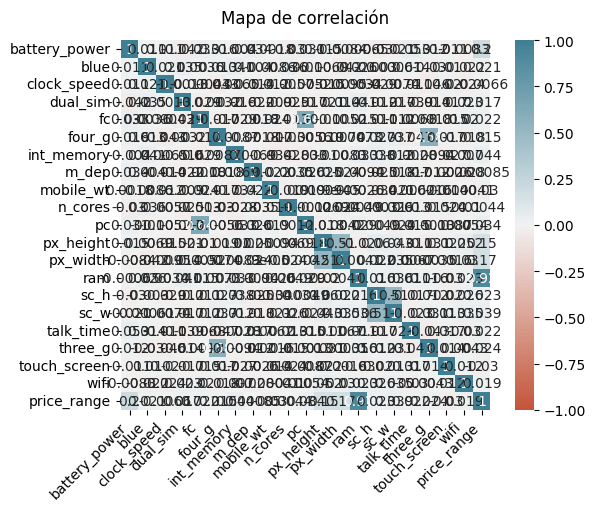

In [10]:
corr = data.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200, as_cmap=True),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_title('Mapa de correlación', fontdict={'fontsize':12}, pad=12);

## Variables catégoricas

### **1.2. Escriba el código para su análisis y la creación de gráficos de frecuencia:**


== blue ==


,count,percent(%)
blue,,
0,1010,50.5
1,990,49.5



== dual_sim ==


,count,percent(%)
dual_sim,,
0,981,49.05
1,1019,50.95



== four_g ==


,count,percent(%)
four_g,,
0,957,47.85
1,1043,52.15



== three_g ==


,count,percent(%)
three_g,,
0,477,23.85
1,1523,76.15



== touch_screen ==


,count,percent(%)
touch_screen,,
0,994,49.7
1,1006,50.3



== wifi ==


,count,percent(%)
wifi,,
0,986,49.3
1,1014,50.7


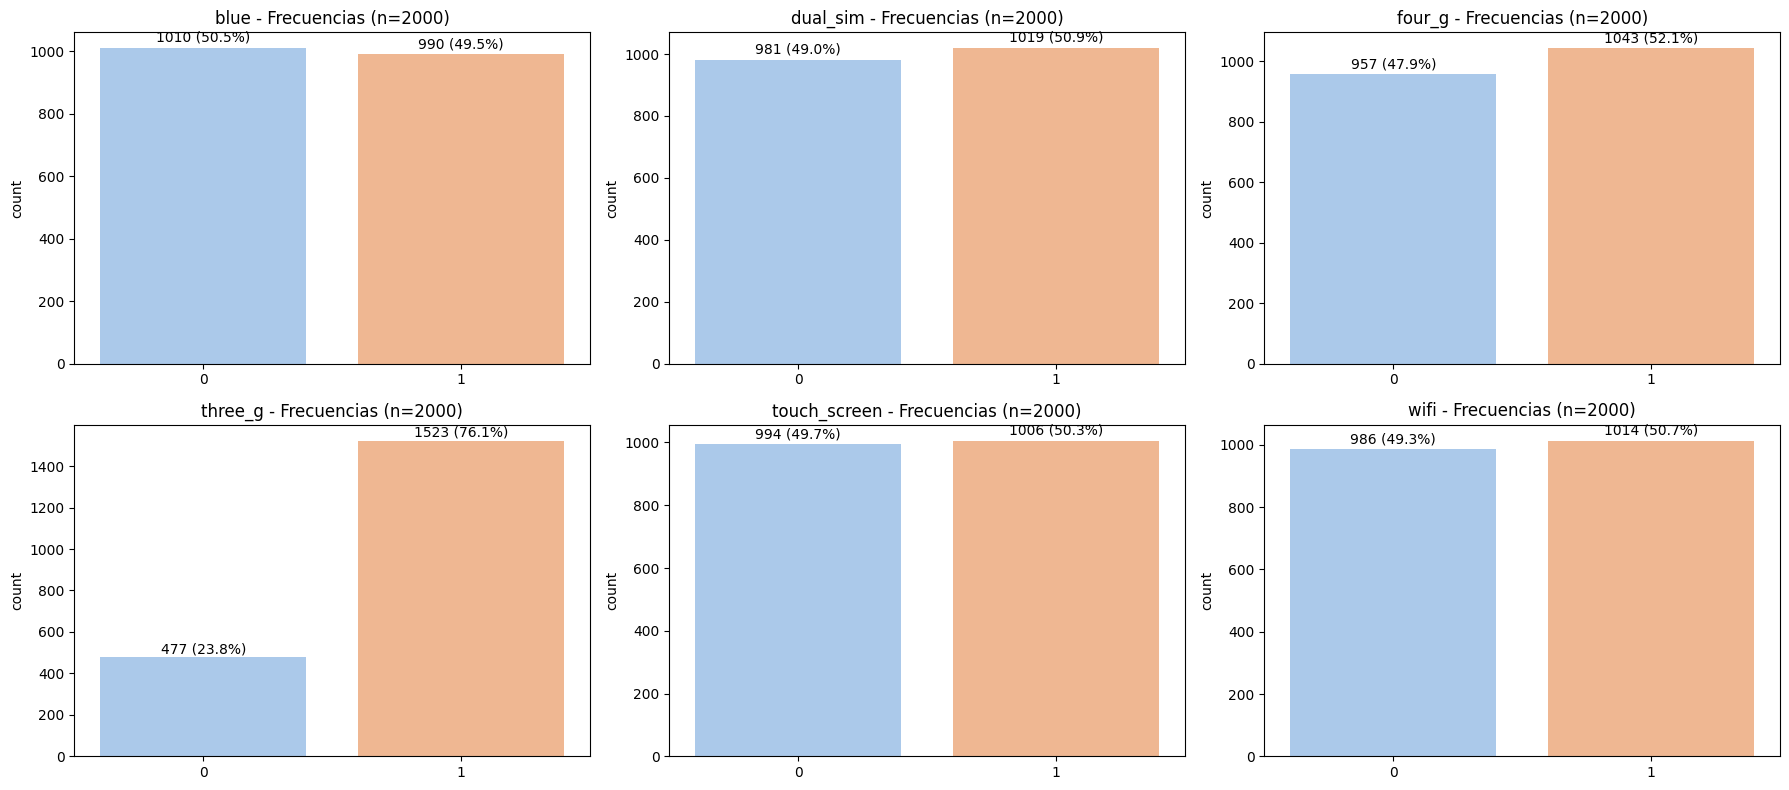

In [ ]:
candidatas = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores', 'price_range']

cat_cols = [c for c in candidatas if c in data.columns]

if not cat_cols:
    cat_cols = [col for col in data.columns if data[col].nunique() <= 5 and pd.api.types.is_integer_dtype(data[col])]

for col in cat_cols:
    print(f'== {col} ==')
    vc = data[col].value_counts().sort_index()
    pct = data[col].value_counts(normalize=True).sort_index().mul(100).round(2)
    freq_df = pd.DataFrame({'count': vc, 'percent(%)': pct})
    display(freq_df)
    print()

n = len(cat_cols)
if n:
    cols = 3
    rows = (n + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    axs = axs.flatten()
    total = len(data)
    for i, col in enumerate(cat_cols):
        ax = axs[i]
        sns.countplot(x=col, data=data, ax=ax, palette='pastel', hue=col, legend=False)
        # Quitar leyenda si quedó presente en algunas versiones
        if ax.get_legend() is not None:
            ax.get_legend().remove()
        ax.set_title(f'{col} - Frecuencias (n={total})')
        counts = data[col].value_counts().sort_index()
        # Anotar conteos y porcentajes encima de las barras
        for j, val in enumerate(counts.index):
            cnt = counts.loc[val]
            pct = cnt / total * 100
            ax.text(j, cnt + total*0.01, f'{cnt} ({pct:.1f}%)', ha='center', fontsize=10)
        ax.set_xlabel('')
    # eliminar ejes sobrantes
    for k in range(i+1, len(axs)):
        fig.delaxes(axs[k])
    plt.tight_layout()
    plt.show()

### **1.3. Escriba el código que permita validar si el dataset está balanceado**

In [ ]:
print(data['price_range'].value_counts())

## PREPROCESAMIENTO DE DATOS

In [12]:
#Crear una copia del dataset para modificaciones
data2 = data.copy()

In [13]:
#Verificar tamaño
data2.shape

(2000, 21)

In [14]:
# Separación de los datos en train y test
X = data2.drop(columns = 'price_range')
y = data2['price_range']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = seed,
                                        shuffle      = True
                                    )

### Escriba el código que permita reescalar todos los atributos del dataset utilizando la función del StandardScaler:

In [15]:
# Código para reescalar X_train y X_test mediante StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Aplicación de SVM sobre los datos

⚠️ Importante:

A partir de esta sección, utiliza los datos estandarizados.

### **2.1. Escriba el código que permita crear un modelo utilizando SVM con kernel lineal, el valor de C =1 y random_state=seed**

In [16]:
# Creación del modelo SVM lineal
modeloSVM = SVC(C=1, kernel='linear', random_state=seed)
modeloSVM.fit(X_train_scaled, y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
# Predicciones test
predictSVM = modeloSVM.predict(X_test_scaled)
predictSVM

array([1, 2, 2, 2, 2, 2, 1, 3, 1, 3, 3, 3, 0, 2, 3, 0, 3, 2, 2, 2, 0, 1,
       1, 0, 3, 2, 0, 3, 1, 0, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 2,
       1, 0, 2, 2, 0, 3, 3, 0, 1, 2, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       0, 3, 3, 3, 0, 3, 1, 3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 0, 2, 3, 2, 3,
       3, 1, 1, 2, 0, 1, 3, 0, 1, 2, 2, 2, 0, 1, 0, 2, 3, 2, 3, 3, 1, 1,
       2, 2, 0, 1, 2, 3, 3, 2, 2, 1, 1, 0, 1, 2, 3, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 3, 0, 2, 0, 2, 0, 0, 3, 0, 3,
       1, 3, 2, 2, 1, 2, 2, 3, 0, 2, 2, 1, 1, 2, 0, 0, 1, 3, 1, 1, 3, 1,
       3, 0, 2, 2, 3, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 2, 3, 3, 0, 2, 1, 3, 3, 1, 3, 1, 0, 3, 1, 2, 3, 3, 2, 3, 3,
       3, 2, 0, 3, 0, 3, 1, 0, 2, 3, 0, 0, 2, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       2, 0, 2, 2, 3, 2, 3, 1, 1, 3, 1, 3, 2, 0, 2, 1, 0, 2, 3, 1, 0, 0,
       0, 0, 1, 3, 2, 2, 1, 0, 3, 0, 0, 2, 3, 0, 3, 2, 1, 1, 3, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 3, 3,

### **2.2. Escriba el código que permita hallar la exactitud (accuracy) del modelo SVM anteriormente entrenado:**

In [18]:
accuracy = accuracy_score(y_test, predictSVM)
print("Exactitud del modelo SVM:", accuracy)

Exactitud del modelo SVM: 0.9675


### **2.3. Escriba el código que permita encontrar los mejores parámetros para el modelo  SVM, con un param_grid = {'C': np.linspace(0.1, 100, 20), 'kernel': ('linear', 'rbf')**

#### Ajuste de hiperparámetros (GridSearchCV)

⚠️ Restricción:

**No imprimas los resultados del GridSearchCV**. Solo utiliza los mejores parámetros encontrados.

In [ ]:
# Para que no se impriman los resultados, estos se asignan a _
# Parametros y los valores que van a tomar
param_grid = {
    'C': np.linspace(0.1, 100, 20),
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)

# fitting the model for grid search
# Para que no se impriman los resultados, estos se asignan a _
_ = grid.fit(X_train_scaled, y_train)

# Se asignan los resultados a un dataframe
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

### **2.4. Escriba el código que permita conocer los mejores parámetros encontrados en el ítem anterior**

In [ ]:
# print best parameter after tuning
print(f'Mejores hiperparámetros {grid.best_params_}')

### **2.5. Escriba el código que permita hallar la exactitud del modelo de SVM aplicando los mejores parámetros**

In [ ]:
# Accuracy de test del modelo
# ==============================================================================
accuracy = grid.best_score_
print(f'Accuracy del modelo SVM optimizado: {accuracy}')

### **2.6. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

In [ ]:
class_label = ['False', 'True']
print(classification_report(y_test, predictSVM, target_names=class_label))

# 3. REDES NEURONALES

⚠️ Recordatorio:

* Mantén los datos normalizados (los mismos que usaste en SVM).
* No regreses al dataset original ni repitas pasos anteriores, a menos que se indique explícitamente.

### **3.1. Escriba el código que permita entrenar un perceptrón multicapa con 3 capas ocultas con 200, 100 y 50 neuronas respectivamente en cada capa. Función de activación 'Relu' y random_state=seed**

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(200, 100, 50), 
                           activation='relu', 
                           random_state=seed)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

### **3.2. Escriba el código que permita hallar la exactitud del modelo de redes neuronales anteriormente entrenado:**

In [ ]:

accuracy_nn = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo de Red Neuronal: {accuracy_nn}  ')

### **3.3. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

In [ ]:
print(classification_report(y_test, y_pred))

### 4. **Conclusiones**

Escribe tus conclusiones finales, reflexionando sobre los resultados obtenidos con SVM y MLP. Compara los siguientes aspectos:

1. Métricas relevantes:

  * ¿Cuáles métricas fueron clave para evaluar el desempeño?

2. Fortalezas y limitaciones:

  * Ventajas y desventajas de cada modelo en este caso específico.